In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [2]:
enf = pd.read_csv('encoding_finished_v2.csv')
enf= enf.drop(columns =['Unnamed: 0'], axis=1) #필요없는 컬럼 삭제
enf.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,0,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,0,1,0,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,0,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,0,0,1,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,0,0,0,2,0,0


# 특성(x)과 타겟(y)분리

In [3]:
enf.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Attrition_Flag_Attrited Customer',
       'new_income_category', 'new_edu_category', 'new_card_category'],
      dtype='object')

In [4]:
y = enf['Attrition_Flag_Attrited Customer']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag_Attrited Customer, Length: 10127, dtype: int64

In [5]:
x = enf[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category']]
x.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,42,1.625,0.061,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,33,3.714,0.105,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,20,2.333,0.000,1,1,0,0,3,3,0


In [6]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

# train, test 분리

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
x_train.shape, x_test.shape

((7088, 21), (3039, 21))

In [9]:
x_test.shape[0]/(x_train.shape[0]+x_test.shape[0])

0.3000888713340575

# Standard scaler 적용

In [10]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

std_x_train = stdscaler.fit_transform(x_train)
std_x_test = stdscaler.transform(x_test)

In [14]:
print("변환된 후 크기: {}".format(std_x_train.shape))
#print("스케일 조정 전 특성별 최소값:\n {}".format(x_train.min(axis=0)))
#print("스케일 조정 전 특성별 최대값:\n {}".format(x_train.max(axis=0)))
print("스케일 조정 후 x_train 특성별 최소값:\n {}".format(std_x_train.min(axis=0)))
print("스케일 조정 후 x_train 특성별 최대값:\n {}".format(std_x_train.max(axis=0)))
print("스케일 조정 후 x_test 특성별 최소값:\n{}".format(std_x_test.min(axis=0)))
print("스케일 조정 후 x_test 특성별 최대값:\n{}".format(std_x_test.max(axis=0)))

변환된 후 크기: (7088, 21)
스케일 조정 후 x_train 특성별 최소값:
 [-2.51935228 -1.81136824 -2.84810553 -1.7982112  -2.30738102 -2.22835505
 -0.79450132 -1.4265878  -0.8253362  -3.52390966 -1.14047677 -2.33010458
 -2.99506254 -0.99674871 -0.94614331 -0.93283691 -0.7976188  -0.27460127
 -1.01876106 -1.38634512 -0.24756635]
스케일 조정 후 x_train 특성별 최대값:
 [ 2.69329634  2.08111844  2.49072822  1.41213614  3.60218237  3.22808689
  2.86931043  1.66484242  2.99981228  8.87903719  4.06732472  3.11367073
 12.63257661  2.64494114  1.05692234  1.07199875  1.25373173  3.64164378
  1.90826707  1.75659881  8.84440398]
스케일 조정 후 x_test 특성별 최소값:
[-2.51935228 -1.81136824 -2.84810553 -1.7982112  -2.30738102 -2.22835505
 -0.79450132 -1.4265878  -0.82411705 -3.52390966 -1.13468195 -2.33010458
 -2.99506254 -0.99674871 -0.94614331 -0.93283691 -0.7976188  -0.27460127
 -1.01876106 -1.38634512 -0.24756635]
스케일 조정 후 x_test 특성별 최대값:
[ 3.31384975  2.08111844  2.49072822  1.41213614  3.60218237  3.22808689
  2.86931043  1.66484242  2.999

In [11]:
np.min(std_x_train), np.max(std_x_train)

(-3.5239096569115325, 12.632576614913642)

In [12]:
np.min(std_x_test), np.max(std_x_test)

(-3.5239096569115325, 12.226673680007188)

# 1. 로지스틱 회귀

In [15]:
from sklearn.linear_model import LogisticRegression

lgr =LogisticRegression()
lgr.fit(std_x_train, y_train)
lgr_ypred = lgr.predict(std_x_test)
lgr_yproba = lgr.predict_proba(std_x_test)

In [16]:
print('             분류 보고서')
print(classification_report(y_test, lgr_ypred))
print('정확도: ',accuracy_score(y_test, lgr_ypred))
print('재현율: ',recall_score(y_test, lgr_ypred))
print('정밀도: ',precision_score(y_test, lgr_ypred))
print('f1점수: ',f1_score(y_test, lgr_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgr_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2543
           1       0.77      0.56      0.65       496

    accuracy                           0.90      3039
   macro avg       0.85      0.76      0.80      3039
weighted avg       0.89      0.90      0.89      3039

정확도:  0.9012833168805529
재현율:  0.5584677419354839
정밀도:  0.7737430167597765
f1점수:  0.6487119437939111
ROC-AUC점수:  0.763307799398729


# 2.KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(std_x_train, y_train)
knn_ypred = knn_classifier.predict(std_x_test)
knn_yproba = knn_classifier.predict_proba(std_x_test)

In [26]:
print('             분류 보고서')
print(classification_report(y_test, knn_ypred)) 
print('정확도: ',accuracy_score(y_test, knn_ypred))
print('재현율: ',recall_score(y_test, knn_ypred))
print('정밀도: ',precision_score(y_test, knn_ypred))
print('f1점수: ',f1_score(y_test, knn_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, knn_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2543
           1       0.90      0.42      0.57       496

    accuracy                           0.90      3039
   macro avg       0.90      0.70      0.76      3039
weighted avg       0.90      0.90      0.88      3039

정확도:  0.8970055939453768
재현율:  0.4173387096774194
정밀도:  0.8961038961038961
f1점수:  0.5694635488308115
ROC-AUC점수:  0.7039505188182614


In [19]:
import matplotlib.pyplot as plt

k_list = range(1,20)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(std_x_train, y_train)
  acc.append(knn_classifier.score(std_x_test, y_test))#계산된 정확도를 차례로 저장

In [24]:
acc[:12]

[0.8815399802566634,
 0.8808818690358671,
 0.8947022046725897,
 0.8877920368542284,
 0.8930569266205989,
 0.8874629812438302,
 0.8960184271141823,
 0.8920697597894044,
 0.8966765383349786,
 0.8940440934517934,
 0.8970055939453768,
 0.8917407041790063]

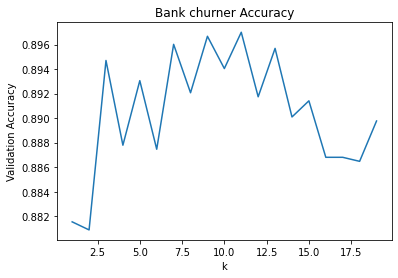

In [21]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Bank churner Accuracy")
plt.show()

# 3.랜덤포레스트

In [27]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=500, max_depth=4,random_state=0) 
rt.fit(std_x_train, y_train)
rt_ypred=rt.predict(std_x_test)
rt_yproba=rt.predict_proba(std_x_test)

In [28]:
print('             분류 보고서')
print(classification_report(y_test, rt_ypred))
print('정확도: ',accuracy_score(y_test, rt_ypred))
print('재현율: ',recall_score(y_test, rt_ypred))
print('정밀도: ',precision_score(y_test, rt_ypred))
print('f1점수: ',f1_score(y_test, rt_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, rt_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2543
           1       0.92      0.44      0.59       496

    accuracy                           0.90      3039
   macro avg       0.91      0.71      0.77      3039
weighted avg       0.90      0.90      0.89      3039

정확도:  0.9012833168805529
재현율:  0.43548387096774194
정밀도:  0.9152542372881356
f1점수:  0.5901639344262295
ROC-AUC점수:  0.7138095721334974


In [29]:
columns = x_train.columns

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.008492,0.000929,0.002994,0.05579,0.020985,0.023878,0.018141,0.156265,0.009003,0.033299,...,0.209025,0.152486,0.095413,0.008467,0.001067,0.000319,0.000068,0.00054,0.000396,0.000198


In [30]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.209025
Total_Trans_Amt,0.202243
Total_Revolving_Bal,0.156265
Total_Ct_Chng_Q4_Q1,0.152486
Avg_Utilization_Ratio,0.095413


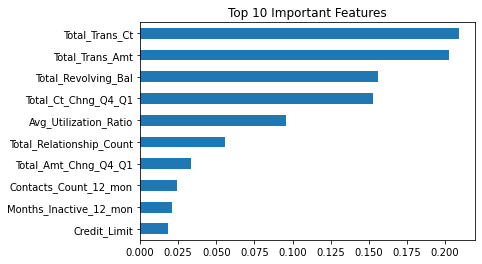

In [31]:
feat_importances = pd.Series(rt.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 4.서포트 벡터 머신

In [32]:
from sklearn.svm import SVC

svc = SVC(C = 1.0, kernel = 'rbf', probability=True)
svc.fit(std_x_train, y_train)
svc_ypred=svc.predict(std_x_test)
svc_yproba=svc.predict_proba(std_x_test)

In [33]:
print('             분류 보고서')
print(classification_report(y_test, svc_ypred))
print('정확도: ',accuracy_score(y_test, svc_ypred))
print('재현율: ',recall_score(y_test, svc_ypred))
print('정밀도: ',precision_score(y_test, svc_ypred))
print('f1점수: ',f1_score(y_test, svc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, svc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2543
           1       0.90      0.64      0.75       496

    accuracy                           0.93      3039
   macro avg       0.91      0.81      0.85      3039
weighted avg       0.93      0.93      0.92      3039

정확도:  0.9292530437643962
재현율:  0.6411290322580645
정밀도:  0.895774647887324
f1점수:  0.7473560517038778
ROC-AUC점수:  0.8132896439308411


# 5.나이브 베이즈

In [34]:
# 가우시안 나이브 베이즈
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(std_x_train, y_train)
gnb_ypred=gnb.predict(std_x_test)
gnb_yproba=gnb.predict_proba(std_x_test)

In [35]:
print('             분류 보고서')
print(classification_report(y_test, gnb_ypred))
print('정확도: ',accuracy_score(y_test, gnb_ypred))
print('재현율: ',recall_score(y_test, gnb_ypred))
print('정밀도: ',precision_score(y_test, gnb_ypred))
print('f1점수: ',f1_score(y_test, gnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2543
           1       0.62      0.62      0.62       496

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.88      0.88      0.88      3039

정확도:  0.876604146100691
재현율:  0.6209677419354839
정밀도:  0.6222222222222222
f1점수:  0.6215943491422804
ROC-AUC점수:  0.7737162736417491


In [36]:
# 다항분포 나이브 베이즈
from sklearn.naive_bayes import MultinomialNB

Mnb = MultinomialNB()
Mnb.fit(std_x_train, y_train)
mnb_ypred=Mnb.predict(std_x_test)
mnb_yproba=Mnb.predict_proba(std_x_test)
# 다항분포 나이브 베이즈는 음수값을 입력할 수 없음

ValueError: Negative values in data passed to MultinomialNB (input X)

In [28]:
# print('             분류 보고서')
# print(classification_report(y_test, mnb_ypred))
# print('정확도: ',accuracy_score(y_test, mnb_ypred))
# print('재현율: ',recall_score(y_test, mnb_ypred))
# print('정밀도: ',precision_score(y_test, mnb_ypred))
# print('f1점수: ',f1_score(y_test, mnb_ypred))
# print('ROC-AUC점수: ',roc_auc_score(y_test, mnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      2543
           1       0.22      0.44      0.30       496

    accuracy                           0.66      3039
   macro avg       0.54      0.57      0.53      3039
weighted avg       0.76      0.66      0.70      3039

정확도:  0.6587693320171109
재현율:  0.4375
정밀도:  0.22256410256410256
f1점수:  0.29503738953093134
ROC-AUC점수:  0.5697134290208415


# 6.신경망 MLP 분류

In [37]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'adam', hidden_layer_sizes = (4, 4), learning_rate_init = 0.1)
mlp.fit(std_x_train, y_train)
mlp_ypred = mlp.predict(std_x_test)
mlp_yproba=mlp.predict_proba(std_x_test)

In [38]:
print('             분류 보고서')
print(classification_report(y_test, mlp_ypred))
print('정확도: ',accuracy_score(y_test, mlp_ypred))
print('재현율: ',recall_score(y_test, mlp_ypred))
print('정밀도: ',precision_score(y_test, mlp_ypred))
print('f1점수: ',f1_score(y_test, mlp_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mlp_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2543
           1       0.88      0.66      0.75       496

    accuracy                           0.93      3039
   macro avg       0.91      0.82      0.85      3039
weighted avg       0.93      0.93      0.92      3039

정확도:  0.928923988153998
재현율:  0.655241935483871
정밀도:  0.8783783783783784
f1점수:  0.7505773672055427
ROC-AUC점수:  0.8187731502035951


# 7.Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0,learning_rate=0.5)
gbc.fit(std_x_train,y_train)
gbc_ypred=gbc.predict(std_x_test)
gbc_yproba=gbc.predict_proba(std_x_test)

In [40]:
print('             분류 보고서')
print(classification_report(y_test,gbc_ypred))
print('정확도: ',accuracy_score(y_test, gbc_ypred))
print('재현율: ',recall_score(y_test, gbc_ypred))
print('정밀도: ',precision_score(y_test, gbc_ypred))
print('f1점수: ',f1_score(y_test, gbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2543
           1       0.92      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9690687726225732
재현율:  0.8850806451612904
정밀도:  0.9222689075630253
f1점수:  0.9032921810699589
ROC-AUC점수:  0.9352654503824541


In [41]:
columns = x_train.columns

feature_importance = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.0184,0.000717,0.002717,0.079492,0.010013,0.016839,0.003539,0.189779,0.009805,0.036065,...,0.346777,0.082224,0.003819,0.000747,0.00182,0.00005,0.000189,0.000549,0.001734,0.0


In [42]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492


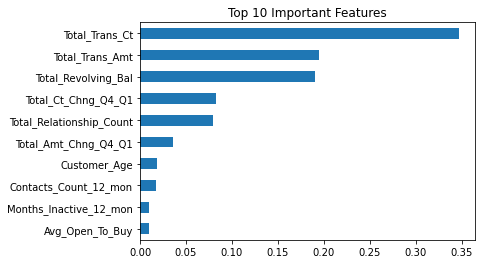

In [43]:
feat_importances = pd.Series(gbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 8.XGBoost classifier

In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=1.0, max_depth =4)
xgb.fit(std_x_train, y_train)
xgb_ypred = xgb.predict(std_x_test)
xgb_yproba = xgb.predict_proba(std_x_test)

[12:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
print('             분류 보고서')
print(classification_report(y_test, xgb_ypred))
print('정확도: ',accuracy_score(y_test, xgb_ypred)) 
print('재현율: ',recall_score(y_test,  xgb_ypred))
print('정밀도: ',precision_score(y_test,  xgb_ypred))
print('f1점수: ',f1_score(y_test,  xgb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, xgb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.89      0.89      0.89       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9651201052977953
재현율:  0.8931451612903226
정밀도:  0.8931451612903226
f1점수:  0.8931451612903226
ROC-AUC점수:  0.9361518177666713


In [46]:
columns = x_train.columns

feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.034004,0.011509,0.014365,0.146423,0.07735,0.05099,0.019263,0.146235,0.010699,0.034397,...,0.22117,0.055214,0.009926,0.019697,0.015639,0.005338,0.02236,0.00899,0.010633,0.007575


In [47]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


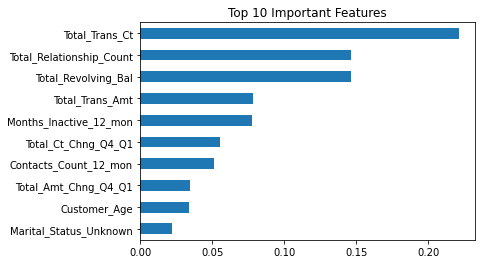

In [48]:
feat_importances = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 9.LightGBM

In [49]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(std_x_train, y_train)
lgbm_ypred = lgbm.predict(std_x_test)
lgbm_yproba = lgbm.predict_proba(std_x_test)

In [50]:
print('             분류 보고서')
print(classification_report(y_test, lgbm_ypred))
print('정확도: ',accuracy_score(y_test, lgbm_ypred)) 
print('재현율: ',recall_score(y_test,  lgbm_ypred))
print('정밀도: ',precision_score(y_test,  lgbm_ypred))
print('f1점수: ',f1_score(y_test,  lgbm_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgbm_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.90      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9684106614017769
재현율:  0.8971774193548387
정밀도:  0.9081632653061225
f1점수:  0.9026369168356998
ROC-AUC점수:  0.9397408921390789


In [51]:
columns = x_train.columns
feature_importance = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,837,194,591,539,354,386,658,709,519,1484,...,1202,1089,325,128,119,79,45,181,212,12


In [52]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Amt,2337
Total_Amt_Chng_Q4_Q1,1484
Total_Trans_Ct,1202
Total_Ct_Chng_Q4_Q1,1089
Customer_Age,837


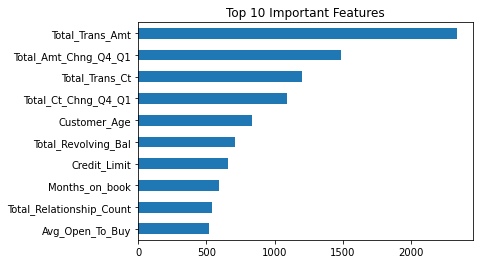

In [53]:
feat_importances = pd.Series(lgbm.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 10.catboost

In [54]:
from catboost import CatBoostClassifier, Pool

cbc = CatBoostClassifier()
cbc.fit(std_x_train, y_train)
cbc_ypred = cbc.predict(std_x_test)
cbc_yproba = cbc.predict_proba(std_x_test)

Learning rate set to 0.023774
0:	learn: 0.6593964	total: 149ms	remaining: 2m 29s
1:	learn: 0.6310265	total: 156ms	remaining: 1m 17s
2:	learn: 0.6030996	total: 162ms	remaining: 53.7s
3:	learn: 0.5760449	total: 167ms	remaining: 41.7s
4:	learn: 0.5514639	total: 173ms	remaining: 34.5s
5:	learn: 0.5308499	total: 181ms	remaining: 29.9s
6:	learn: 0.5097667	total: 188ms	remaining: 26.7s
7:	learn: 0.4904607	total: 195ms	remaining: 24.2s
8:	learn: 0.4717865	total: 202ms	remaining: 22.2s
9:	learn: 0.4561123	total: 209ms	remaining: 20.7s
10:	learn: 0.4404298	total: 220ms	remaining: 19.8s
11:	learn: 0.4258466	total: 230ms	remaining: 19s
12:	learn: 0.4129611	total: 238ms	remaining: 18.1s
13:	learn: 0.3987729	total: 245ms	remaining: 17.3s
14:	learn: 0.3884618	total: 252ms	remaining: 16.5s
15:	learn: 0.3764435	total: 258ms	remaining: 15.9s
16:	learn: 0.3661287	total: 264ms	remaining: 15.3s
17:	learn: 0.3512598	total: 270ms	remaining: 14.7s
18:	learn: 0.3460445	total: 277ms	remaining: 14.3s
19:	learn: 

167:	learn: 0.1011724	total: 1.22s	remaining: 6.04s
168:	learn: 0.1007055	total: 1.23s	remaining: 6.03s
169:	learn: 0.1001548	total: 1.23s	remaining: 6.02s
170:	learn: 0.0999839	total: 1.24s	remaining: 6.03s
171:	learn: 0.0996465	total: 1.25s	remaining: 6.01s
172:	learn: 0.0992939	total: 1.25s	remaining: 6s
173:	learn: 0.0987212	total: 1.26s	remaining: 5.99s
174:	learn: 0.0985235	total: 1.27s	remaining: 5.97s
175:	learn: 0.0983303	total: 1.27s	remaining: 5.96s
176:	learn: 0.0980891	total: 1.28s	remaining: 5.94s
177:	learn: 0.0977123	total: 1.28s	remaining: 5.92s
178:	learn: 0.0973905	total: 1.29s	remaining: 5.91s
179:	learn: 0.0969536	total: 1.29s	remaining: 5.89s
180:	learn: 0.0963983	total: 1.3s	remaining: 5.88s
181:	learn: 0.0961493	total: 1.3s	remaining: 5.86s
182:	learn: 0.0959197	total: 1.31s	remaining: 5.85s
183:	learn: 0.0956470	total: 1.31s	remaining: 5.83s
184:	learn: 0.0953859	total: 1.32s	remaining: 5.82s
185:	learn: 0.0949158	total: 1.33s	remaining: 5.8s
186:	learn: 0.0946

338:	learn: 0.0652633	total: 2.25s	remaining: 4.39s
339:	learn: 0.0651156	total: 2.26s	remaining: 4.38s
340:	learn: 0.0649426	total: 2.27s	remaining: 4.38s
341:	learn: 0.0648114	total: 2.27s	remaining: 4.37s
342:	learn: 0.0646487	total: 2.28s	remaining: 4.37s
343:	learn: 0.0645377	total: 2.29s	remaining: 4.36s
344:	learn: 0.0644438	total: 2.29s	remaining: 4.35s
345:	learn: 0.0642929	total: 2.3s	remaining: 4.34s
346:	learn: 0.0641396	total: 2.3s	remaining: 4.33s
347:	learn: 0.0639583	total: 2.31s	remaining: 4.33s
348:	learn: 0.0638952	total: 2.31s	remaining: 4.32s
349:	learn: 0.0637569	total: 2.32s	remaining: 4.31s
350:	learn: 0.0636580	total: 2.33s	remaining: 4.3s
351:	learn: 0.0635802	total: 2.33s	remaining: 4.29s
352:	learn: 0.0634825	total: 2.33s	remaining: 4.28s
353:	learn: 0.0633440	total: 2.34s	remaining: 4.27s
354:	learn: 0.0632138	total: 2.35s	remaining: 4.26s
355:	learn: 0.0631112	total: 2.35s	remaining: 4.25s
356:	learn: 0.0630018	total: 2.36s	remaining: 4.25s
357:	learn: 0.0

516:	learn: 0.0470652	total: 3.29s	remaining: 3.07s
517:	learn: 0.0469500	total: 3.3s	remaining: 3.07s
518:	learn: 0.0468919	total: 3.3s	remaining: 3.06s
519:	learn: 0.0467893	total: 3.31s	remaining: 3.06s
520:	learn: 0.0467002	total: 3.32s	remaining: 3.05s
521:	learn: 0.0466580	total: 3.32s	remaining: 3.04s
522:	learn: 0.0465782	total: 3.33s	remaining: 3.04s
523:	learn: 0.0464532	total: 3.33s	remaining: 3.03s
524:	learn: 0.0463776	total: 3.34s	remaining: 3.02s
525:	learn: 0.0462887	total: 3.35s	remaining: 3.01s
526:	learn: 0.0462170	total: 3.35s	remaining: 3.01s
527:	learn: 0.0460989	total: 3.36s	remaining: 3s
528:	learn: 0.0459982	total: 3.36s	remaining: 2.99s
529:	learn: 0.0459058	total: 3.37s	remaining: 2.99s
530:	learn: 0.0458171	total: 3.37s	remaining: 2.98s
531:	learn: 0.0457828	total: 3.38s	remaining: 2.97s
532:	learn: 0.0456902	total: 3.38s	remaining: 2.96s
533:	learn: 0.0456245	total: 3.39s	remaining: 2.96s
534:	learn: 0.0455713	total: 3.39s	remaining: 2.95s
535:	learn: 0.045

688:	learn: 0.0362782	total: 4.34s	remaining: 1.96s
689:	learn: 0.0362232	total: 4.35s	remaining: 1.95s
690:	learn: 0.0361560	total: 4.36s	remaining: 1.95s
691:	learn: 0.0361000	total: 4.37s	remaining: 1.95s
692:	learn: 0.0360358	total: 4.38s	remaining: 1.94s
693:	learn: 0.0359957	total: 4.39s	remaining: 1.94s
694:	learn: 0.0359322	total: 4.41s	remaining: 1.93s
695:	learn: 0.0358743	total: 4.42s	remaining: 1.93s
696:	learn: 0.0358085	total: 4.43s	remaining: 1.93s
697:	learn: 0.0357524	total: 4.44s	remaining: 1.92s
698:	learn: 0.0357267	total: 4.45s	remaining: 1.92s
699:	learn: 0.0357015	total: 4.46s	remaining: 1.91s
700:	learn: 0.0356600	total: 4.46s	remaining: 1.9s
701:	learn: 0.0356220	total: 4.47s	remaining: 1.9s
702:	learn: 0.0355465	total: 4.48s	remaining: 1.89s
703:	learn: 0.0354812	total: 4.49s	remaining: 1.89s
704:	learn: 0.0353996	total: 4.5s	remaining: 1.88s
705:	learn: 0.0353694	total: 4.5s	remaining: 1.87s
706:	learn: 0.0353071	total: 4.51s	remaining: 1.87s
707:	learn: 0.03

876:	learn: 0.0281492	total: 5.54s	remaining: 777ms
877:	learn: 0.0281103	total: 5.55s	remaining: 771ms
878:	learn: 0.0280441	total: 5.56s	remaining: 765ms
879:	learn: 0.0280094	total: 5.56s	remaining: 759ms
880:	learn: 0.0279544	total: 5.57s	remaining: 753ms
881:	learn: 0.0279257	total: 5.58s	remaining: 746ms
882:	learn: 0.0279051	total: 5.58s	remaining: 740ms
883:	learn: 0.0278749	total: 5.59s	remaining: 733ms
884:	learn: 0.0278414	total: 5.59s	remaining: 727ms
885:	learn: 0.0278176	total: 5.6s	remaining: 720ms
886:	learn: 0.0277708	total: 5.61s	remaining: 714ms
887:	learn: 0.0277535	total: 5.61s	remaining: 708ms
888:	learn: 0.0277253	total: 5.62s	remaining: 701ms
889:	learn: 0.0276953	total: 5.62s	remaining: 695ms
890:	learn: 0.0276630	total: 5.63s	remaining: 688ms
891:	learn: 0.0276389	total: 5.63s	remaining: 682ms
892:	learn: 0.0276175	total: 5.64s	remaining: 675ms
893:	learn: 0.0275821	total: 5.64s	remaining: 669ms
894:	learn: 0.0275359	total: 5.65s	remaining: 663ms
895:	learn: 0

In [55]:
print('             분류 보고서')
print(classification_report(y_test, cbc_ypred))
print('정확도: ',accuracy_score(y_test, cbc_ypred)) 
print('재현율: ',recall_score(y_test,  cbc_ypred))
print('정밀도: ',precision_score(y_test,  cbc_ypred))
print('f1점수: ',f1_score(y_test,  cbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, cbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.90      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9684106614017769
재현율:  0.8951612903225806
정밀도:  0.9098360655737705
f1점수:  0.9024390243902438
ROC-AUC점수:  0.9389294457904683


In [56]:
columns = x_train.columns
feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,3.17889,0.418323,1.497357,4.820217,2.903648,1.870492,4.445777,5.849693,1.567708,7.441033,...,28.987037,5.491216,1.752732,0.788604,0.719793,0.165848,0.105384,0.196667,0.398696,0.0672


In [57]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,28.987037
Total_Trans_Amt,27.333687
Total_Amt_Chng_Q4_Q1,7.441033
Total_Revolving_Bal,5.849693
Total_Ct_Chng_Q4_Q1,5.491216


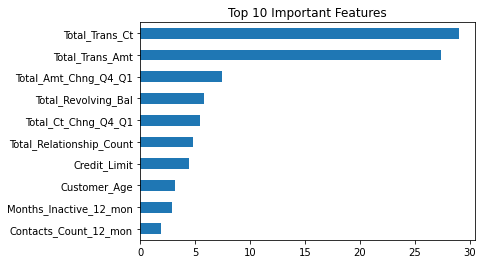

In [58]:
feat_importances = pd.Series(cbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 각 모델별 점수 비교

In [59]:
Comparison = pd.DataFrame({'LogReg':[accuracy_score(y_test, lgr_ypred),recall_score(y_test,  lgr_ypred),precision_score(y_test,  lgr_ypred),f1_score(y_test,  lgr_ypred),roc_auc_score(y_test, lgr_ypred)],
'KNN':[accuracy_score(y_test, knn_ypred),recall_score(y_test,  knn_ypred),precision_score(y_test,  knn_ypred),f1_score(y_test,  knn_ypred),roc_auc_score(y_test, knn_ypred)],
'RandFor':[accuracy_score(y_test, rt_ypred),recall_score(y_test,  rt_ypred),precision_score(y_test,  rt_ypred),f1_score(y_test,  rt_ypred),roc_auc_score(y_test, rt_ypred)],    
'SVM':[accuracy_score(y_test, svc_ypred),recall_score(y_test,  svc_ypred),precision_score(y_test,  svc_ypred),f1_score(y_test,  svc_ypred),roc_auc_score(y_test, svc_ypred)],
'GNB':[accuracy_score(y_test, gnb_ypred),recall_score(y_test,  gnb_ypred),precision_score(y_test,  gnb_ypred),f1_score(y_test,  gnb_ypred),roc_auc_score(y_test, gnb_ypred)],
#"MNB":[accuracy_score(y_test, mnb_ypred),recall_score(y_test,  mnb_ypred),precision_score(y_test,  mnb_ypred),f1_score(y_test,  mnb_ypred),roc_auc_score(y_test, mnb_ypred)],
"MLP":[accuracy_score(y_test, mlp_ypred),recall_score(y_test,  mlp_ypred),precision_score(y_test,  mlp_ypred),f1_score(y_test,  mlp_ypred),roc_auc_score(y_test, mlp_ypred)],
"GradBoost":[accuracy_score(y_test, gbc_ypred),recall_score(y_test,  gbc_ypred),precision_score(y_test,  gbc_ypred),f1_score(y_test,  gbc_ypred),roc_auc_score(y_test, gbc_ypred)],
"XGBoost":[accuracy_score(y_test, xgb_ypred),recall_score(y_test,  xgb_ypred),precision_score(y_test,  xgb_ypred),f1_score(y_test,  xgb_ypred),roc_auc_score(y_test, xgb_ypred)],
"LightGBM":[accuracy_score(y_test, lgbm_ypred),recall_score(y_test,  lgbm_ypred),precision_score(y_test,  lgbm_ypred),f1_score(y_test,  lgbm_ypred),roc_auc_score(y_test, lgbm_ypred)],
'CatBoost':[accuracy_score(y_test, cbc_ypred),recall_score(y_test,  cbc_ypred),precision_score(y_test,  cbc_ypred),f1_score(y_test,  cbc_ypred),roc_auc_score(y_test, cbc_ypred)]},
                          index = ['ACC', 'Recall', 'Precision', 'F1', 'ROC-AUC'])
Comparison

,LogReg,KNN,RandFor,SVM,GNB,MLP,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.901283,0.897006,0.901283,0.929253,0.876604,0.928924,0.969069,0.965120,0.968411,0.968411
Recall,0.558468,0.417339,0.435484,0.641129,0.620968,0.655242,0.885081,0.893145,0.897177,0.895161
Precision,0.773743,0.896104,0.915254,0.895775,0.622222,0.878378,0.922269,0.893145,0.908163,0.909836
F1,0.648712,0.569464,0.590164,0.747356,0.621594,0.750577,0.903292,0.893145,0.902637,0.902439
ROC-AUC,0.763308,0.703951,0.713810,0.813290,0.773716,0.818773,0.935265,0.936152,0.939741,0.938929


In [60]:
Comparison.max(axis=1)

ACC          0.969069
Recall       0.897177
Precision    0.922269
F1           0.903292
ROC-AUC      0.939741
dtype: float64

In [61]:
result = Comparison.max(axis=1)
result.index = Comparison.idxmax(axis=1)
result.index

Index(['GradBoost', 'LightGBM', 'GradBoost', 'GradBoost', 'LightGBM'], dtype='object')

In [62]:
top4 = Comparison[['GradBoost', 'XGBoost', 'LightGBM', 'CatBoost']]
top4

,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.969069,0.965120,0.968411,0.968411
Recall,0.885081,0.893145,0.897177,0.895161
Precision,0.922269,0.893145,0.908163,0.909836
F1,0.903292,0.893145,0.902637,0.902439
ROC-AUC,0.935265,0.936152,0.939741,0.938929


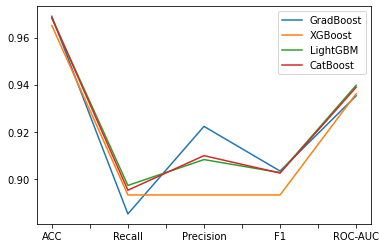

In [63]:
top4.plot()
plt.show()

# Top4 모델별 Feature importance 비교

In [64]:
# Gradient Boosting Classifier
grad_df = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
grad_dft = grad_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
grad_dft

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492


In [65]:
# XGbBoost
xgboost_df = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
xgboost_dft = xgboost_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
xgboost_dft

,feature_importance
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


In [66]:
# LightGBM
lightgbm_df = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
lightgbm_dft = lightgbm_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
lightgbm_dft

,feature_importance
Total_Trans_Amt,2337
Total_Amt_Chng_Q4_Q1,1484
Total_Trans_Ct,1202
Total_Ct_Chng_Q4_Q1,1089
Customer_Age,837


In [67]:
# CatBoost
cat_df = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
cat_dft = cat_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
cat_dft

,feature_importance
Total_Trans_Ct,28.987037
Total_Trans_Amt,27.333687
Total_Amt_Chng_Q4_Q1,7.441033
Total_Revolving_Bal,5.849693
Total_Ct_Chng_Q4_Q1,5.491216


In [68]:
freq = pd.concat([grad_dft, xgboost_dft, lightgbm_dft, cat_dft])
freq

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


In [69]:
result = freq.max(axis=0)
result.index = freq.idxmax(axis=0)
result.index

Index(['Total_Trans_Amt'], dtype='object')